In [17]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [18]:
load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx",header = None)
load_data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [19]:
load_data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [20]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fb9e60d1a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb9e5ff9250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9e5f4c7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9e5ffb1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb9e5fdfbd0>,
  <matplotlib.lines.Line2D at 0x7fb9e5ff5510>]}

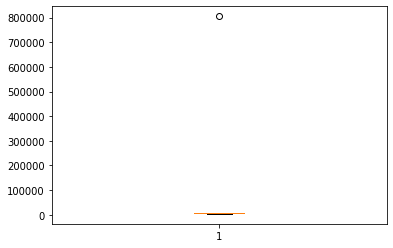

In [21]:
plt.boxplot(load_data.iloc[:,0])

In [22]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([929]),)


In [23]:
load_data.iloc[929,0] = load_data.iloc[928,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fb9e5f38790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb9e5f3d7d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9e5f44810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9e5f442d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb9e5f38d10>,
  <matplotlib.lines.Line2D at 0x7fb9e5f3d290>]}

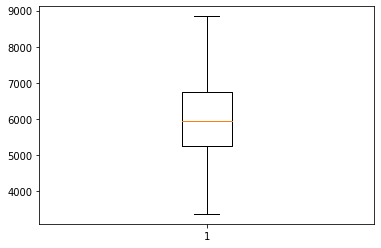

In [24]:
plt.boxplot(load_data.iloc[:,0])

In [25]:
data = minmax_scale(load_data.iloc[:,0])
print(data)

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


In [26]:
x = []
y = []
for i in range(1,len(data)-24):
  temp = [data[i],data[i+23]]
  x.append(temp)
  y.append(data[i+24])

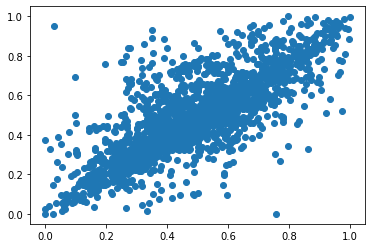

In [27]:
x = np.array(x)
y = np.array(y)

plt.scatter(x[:,[1]],y)

In [28]:
print(x[[1][0]][0])
print(x[[1][0]][1])
print(y[[1]][0])

print(x)
print(y)

0.2764543094348234
0.25579869333257255
0.24450087016062294
[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1727
1727
432
432


In [30]:
def gradientm0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0

def gradientm1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1

def gradientc(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)

def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + math.pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

In [31]:
learning_rate = 0.01
epochs = 50

m0 = 1
m1 = 1
c = 1

Gm0 = 0
Gm1 = 0
Gc = 0
e = pow(10,-6)
number_of_samples = len(x_train)
error_list = []

In [32]:
for i in range(epochs):
    for j in range(number_of_samples):
        gradient_m0 = gradientm0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_m1 = gradientm1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_c = gradientc(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = Gm0 + gradient_m0**2
        Gm1 = Gm1 + gradient_m1**2
        Gc = Gc + gradient_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        deltam0 = -1*learning_rate_m0*gradient_m0
        deltam1 = -1*learning_rate_m1*gradient_m1
        deltac = -1*learning_rate_c*gradient_c
        
        m0 = m0 + deltam0
        m1 = m1 + deltam1
        c = c + deltac
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.04891481589794811
0.012000338269067443
0.008255188314186604
0.007755081830593779
0.008740005767966096
0.011387220468130994
0.011374202004835226
0.008032595273214326
0.008207193146781176
0.0077611009735015215
0.007685279052148865
0.007910312621017403
0.007665990533136649
0.0076325417469935855
0.007605870024201131
0.008365580519031171
0.0076976312016234965
0.007771135816189231
0.007773413240913739
0.0076621900814645184
0.007750491823087191
0.00779186987430143
0.008270881041169843
0.007679668895325744
0.00772389573290493
0.008545969266307957
0.007832942778109614
0.00776237150013088
0.00775001155329773
0.007762652472429906
0.008024555452609529
0.007824673166469285
0.008136773054428219
0.007899388997727914
0.008362508598378341
0.008003523968295774
0.007919571132401302
0.007899878645909474
0.008018240703284751
0.007923305614046718
0.00795065066669627
0.007940006942477814
0.007929119831454194
0.007983437495526147
0.00802268215875673
0.007999515602401228
0.007928697987565493
0.00793740252448

Text(0.5, 1.0, 'error graph in case of SGD with AdaGrad')

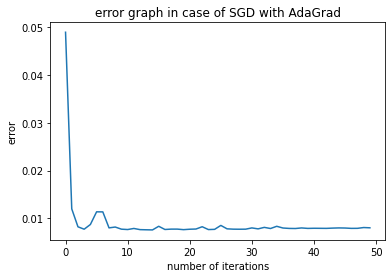

In [33]:
x1 = range(epochs)
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD with AdaGrad")

In [34]:
print(m0,m1,c)

0.5944489473903328 0.08628512087818271 0.17342687036132023


In [35]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)

print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.008256641584461804
test error :  0.007205501384850192


In [36]:
input_load0 = float(input("enter yesterday load at this time : "))
input_load1 = float(input("enter load at previous hour : "))

max_value = 8841.669480
min_value = 3377.919600

input_load0 = (input_load0 - min_value)/(max_value-min_value)
input_load1 = (input_load1 - min_value)/(max_value-min_value)
output_load = input_load0*m0 + input_load1*m0 + c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4300
enter load at previous hour : 3600
predicted load for this hour is :  5005.6258253307205
